## Subway EDA 2

### library import

In [1]:
import os, sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# path 설정
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(""))))
print(sys.path[-1])

d:\base\boostcamp\apart\level2-competitiveds-recsys-06


### 데이터 불러오기

In [44]:
data_path: str = "../../data"
etc_path: str = "../../data/etc"
df: pd.DataFrame = pd.read_csv(os.path.join(etc_path,"train+test+apt_idx+subway_features.csv"))

In [45]:
train_df = df[df['_type']=='train']
test_df = df[df['_type']=='test']

## EDA

In [46]:
train_df

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,...,area_price,area_m2_price,nearest_subway_distance,nearest_subway_idx,num_subway_within_1km,list_subway_idx_within_1km,category_interchange_within_1km,num_subway_within_500m,list_subway_idx_within_500m,category_interchange_within_500m
0,0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,...,658.914729,200.004471,717,40,1,[40],1,0,[],0
1,1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,...,891.472868,270.594284,717,40,1,[40],1,0,[],0
2,2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,...,891.472868,270.594284,717,40,1,[40],1,0,[],0
3,3,59.3400,201907,15,2,1,1986,36.964647,127.055847,33,...,277.777778,84.260195,3897,41,0,[],0,0,[],0
4,4,59.8100,201904,12,2,6,1995,36.972390,127.084514,24,...,99.447514,30.095302,2039,41,0,[],0,0,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801223,1801223,114.8126,202311,25,0,5,2010,37.528394,126.659398,13,...,1120.689655,339.683972,1483,650,0,[],0,0,[],0
1801224,1801224,101.9088,202311,28,0,6,2010,37.528394,126.659398,13,...,1229.773463,372.882420,1483,650,0,[],0,0,[],0
1801225,1801225,114.7900,202312,3,0,19,2010,37.528394,126.659398,13,...,1063.218391,322.327729,1483,650,0,[],0,0,[],0
1801226,1801226,101.9088,202312,4,1,15,2010,37.528394,126.659398,13,...,1113.268608,337.556717,1483,650,0,[],0,0,[],0


In [7]:
train_df.columns

Index(['index', 'area_m2', 'contract_year_month', 'contract_day',
       'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'age',
       'deposit', '_type', 'apt_idx', 'area', 'area_price', 'area_m2_price',
       'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'list_subway_idx_within_1km',
       'has_interchange_within_1km', 'num_subway_within_500m',
       'list_subway_idx_within_500m', 'has_interchange_within_500m'],
      dtype='object')

In [42]:
num_rows_with_subway_within_1km = train_df[train_df['num_subway_within_1km'] >= 1].shape[0]
print(num_rows_with_subway_within_1km)

1139547


In [43]:
num_rows_with_subway_within_1km = train_df[train_df['num_subway_within_500m'] >= 1].shape[0]
print(num_rows_with_subway_within_1km)

566065


## 가설1. 지하철역과 거리가 가까울 수록 가격이 높을 것이다.

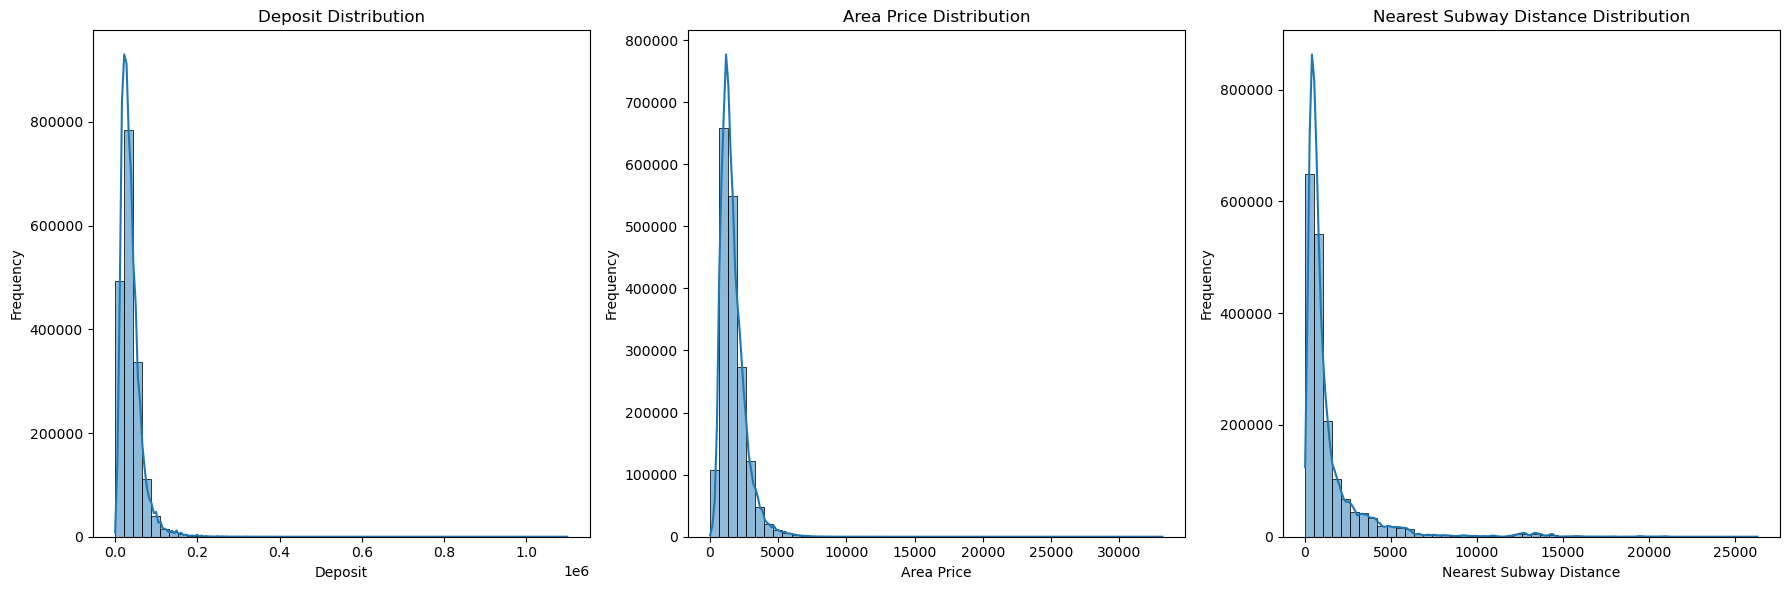

In [8]:
# deposit, area_price, nearest_subway_distance의 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# deposit 분포
sns.histplot(train_df['deposit'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Deposit Distribution')
axes[0].set_xlabel('Deposit')
axes[0].set_ylabel('Frequency')

# area_price 분포
sns.histplot(train_df['area_price'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Area Price Distribution')
axes[1].set_xlabel('Area Price')
axes[1].set_ylabel('Frequency')

# nearest_subway_distance 분포
sns.histplot(train_df['nearest_subway_distance'], bins=50, kde=True, ax=axes[2])
axes[2].set_title('Nearest Subway Distance Distribution')
axes[2].set_xlabel('Nearest Subway Distance')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

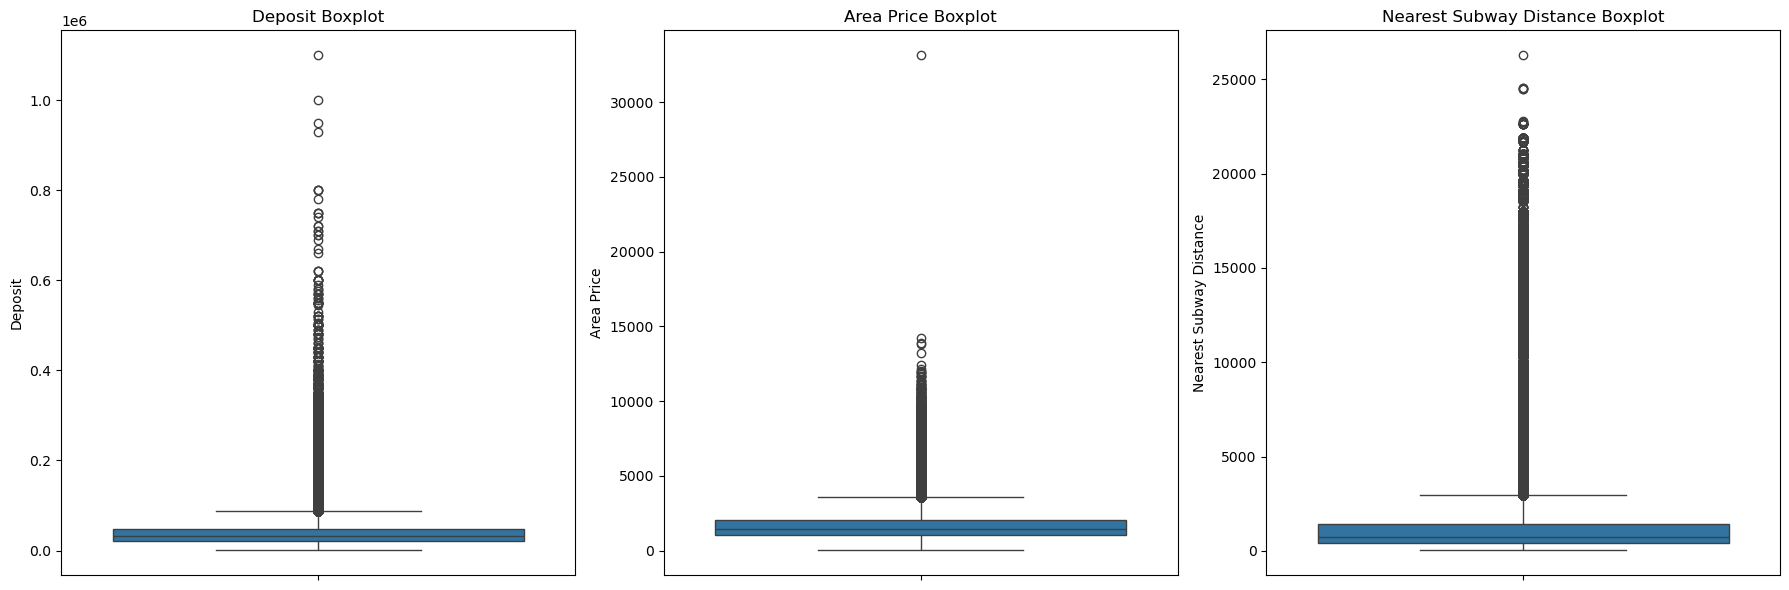

In [9]:
# deposit, area_price, nearest_subway_distance의 boxplot 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# deposit boxplot
sns.boxplot(y=train_df['deposit'], ax=axes[0])
axes[0].set_title('Deposit Boxplot')
axes[0].set_ylabel('Deposit')

# area_price boxplot
sns.boxplot(y=train_df['area_price'], ax=axes[1])
axes[1].set_title('Area Price Boxplot')
axes[1].set_ylabel('Area Price')

# nearest_subway_distance boxplot
sns.boxplot(y=train_df['nearest_subway_distance'], ax=axes[2])
axes[2].set_title('Nearest Subway Distance Boxplot')
axes[2].set_ylabel('Nearest Subway Distance')

plt.tight_layout()
plt.show()

C:\Users\shgkd\AppData\Local\Temp\ipykernel_8828\3442238758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['log_deposit'] = np.log1p(train_df['deposit'])
C:\Users\shgkd\AppData\Local\Temp\ipykernel_8828\3442238758.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['log_area_price'] = np.log1p(train_df['area_price'])
C:\Users\shgkd\AppData\Local\Temp\ipykernel_8828\3442238758.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

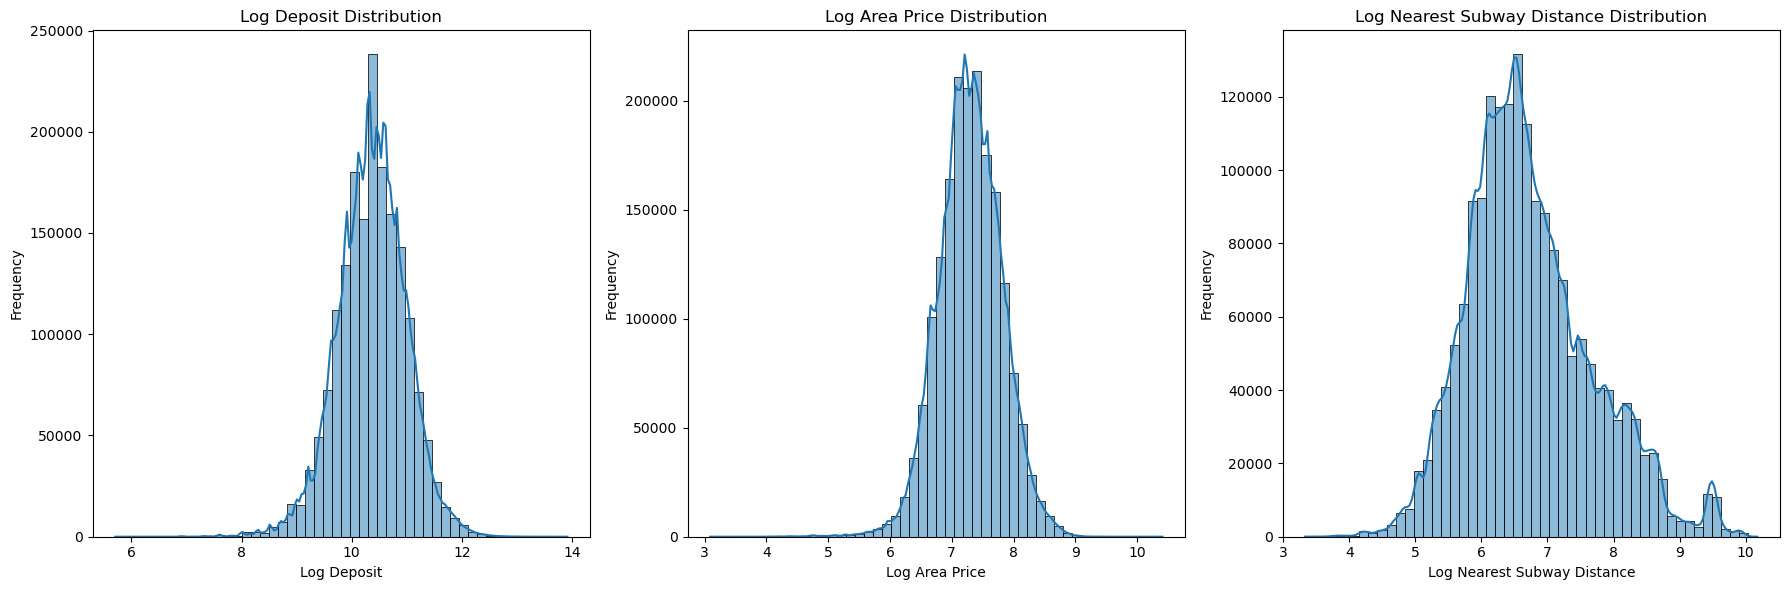

In [10]:
# deposit, area_price, nearest_subway_distance의 로그 변환 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 로그 변환
train_df['log_deposit'] = np.log1p(train_df['deposit'])
train_df['log_area_price'] = np.log1p(train_df['area_price'])
train_df['log_nearest_subway_distance'] = np.log1p(train_df['nearest_subway_distance'])

# log_deposit 분포
sns.histplot(train_df['log_deposit'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Log Deposit Distribution')
axes[0].set_xlabel('Log Deposit')
axes[0].set_ylabel('Frequency')

# log_area_price 분포
sns.histplot(train_df['log_area_price'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Log Area Price Distribution')
axes[1].set_xlabel('Log Area Price')
axes[1].set_ylabel('Frequency')

# log_nearest_subway_distance 분포
sns.histplot(train_df['log_nearest_subway_distance'], bins=50, kde=True, ax=axes[2])
axes[2].set_title('Log Nearest Subway Distance Distribution')
axes[2].set_xlabel('Log Nearest Subway Distance')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
# 세 지표의 상관계수 계산
correlation_matrix = train_df[['deposit', 'area_price', 'nearest_subway_distance']].corr()
print(correlation_matrix)

                          deposit  area_price  nearest_subway_distance
deposit                  1.000000    0.784147                -0.216313
area_price               0.784147    1.000000                -0.294698
nearest_subway_distance -0.216313   -0.294698                 1.000000


In [12]:
# 로그 변환된 세 지표의 상관계수 계산
log_correlation_matrix = train_df[['log_deposit', 'log_area_price', 'log_nearest_subway_distance']].corr()
print(log_correlation_matrix)

                             log_deposit  log_area_price  \
log_deposit                     1.000000        0.810490   
log_area_price                  0.810490        1.000000   
log_nearest_subway_distance    -0.265401       -0.410572   

                             log_nearest_subway_distance  
log_deposit                                    -0.265401  
log_area_price                                 -0.410572  
log_nearest_subway_distance                     1.000000  


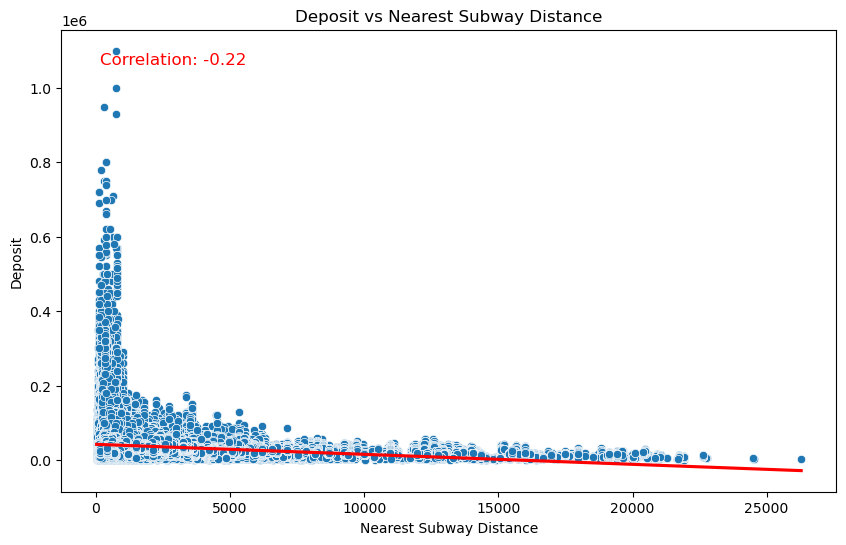

In [19]:
# Deposit과 nearest_subway_distance 사이의 관계 시각화

corr_value = correlation_matrix.loc['deposit', 'nearest_subway_distance']
plt.figure(figsize=(10, 6))
plt.annotate(f'Correlation: {corr_value:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red', ha='left', va='top')
sns.scatterplot(x='nearest_subway_distance', y='deposit', data=train_df)
sns.regplot(data=train_df, x='nearest_subway_distance', y='deposit', scatter=False, color='red')
plt.title('Deposit vs Nearest Subway Distance')
plt.xlabel('Nearest Subway Distance')
plt.ylabel('Deposit')
plt.show()

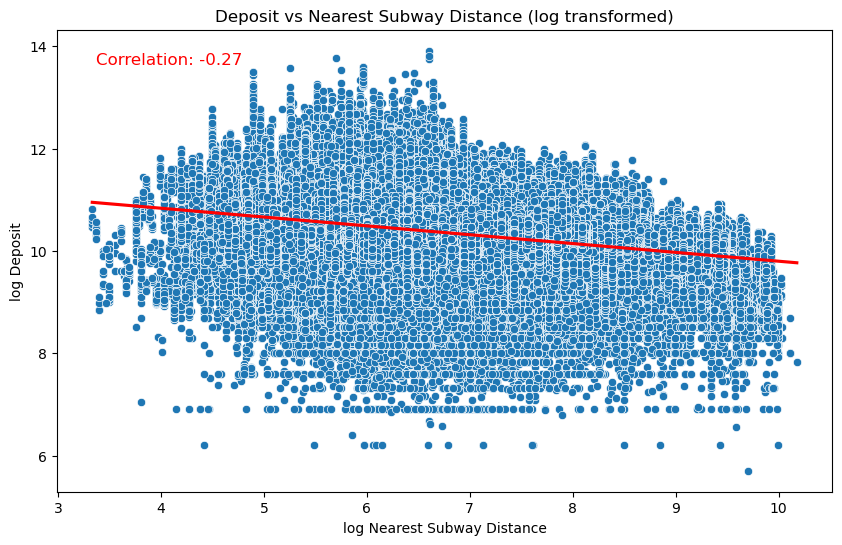

In [22]:
# log_deposit과 log_nearest_subway_distance 사이의 관계 시각화
corr_value_log = log_correlation_matrix.loc['log_deposit', 'log_nearest_subway_distance']

plt.figure(figsize=(10, 6))
plt.annotate(f'Correlation: {corr_value_log:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red', ha='left', va='top')
sns.scatterplot(x='log_nearest_subway_distance', y='log_deposit', data=train_df)
sns.regplot(data=train_df, x='log_nearest_subway_distance', y='log_deposit', scatter=False, color='red')
plt.title('Deposit vs Nearest Subway Distance (log transformed)')
plt.xlabel('log Nearest Subway Distance')
plt.ylabel('log Deposit')
plt.show()

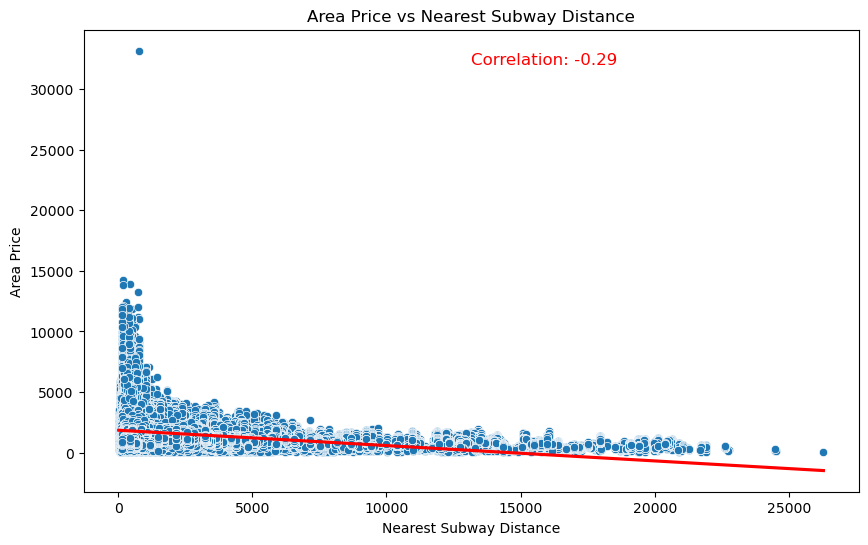

In [23]:
# area_price와 nearest_subway_distance 사이의 관계 시각화
corr_value_area_price = correlation_matrix.loc['area_price', 'nearest_subway_distance']
plt.figure(figsize=(10, 6))
plt.annotate(f'Correlation: {corr_value_area_price:.2f}', xy=(0.5, 0.95), xycoords='axes fraction', fontsize=12, color='red', ha='left', va='top')
sns.scatterplot(x='nearest_subway_distance', y='area_price', data=train_df)
sns.regplot(data=train_df, x='nearest_subway_distance', y='area_price', scatter=False, color='red')
plt.title('Area Price vs Nearest Subway Distance')
plt.xlabel('Nearest Subway Distance')
plt.ylabel('Area Price')
plt.show()

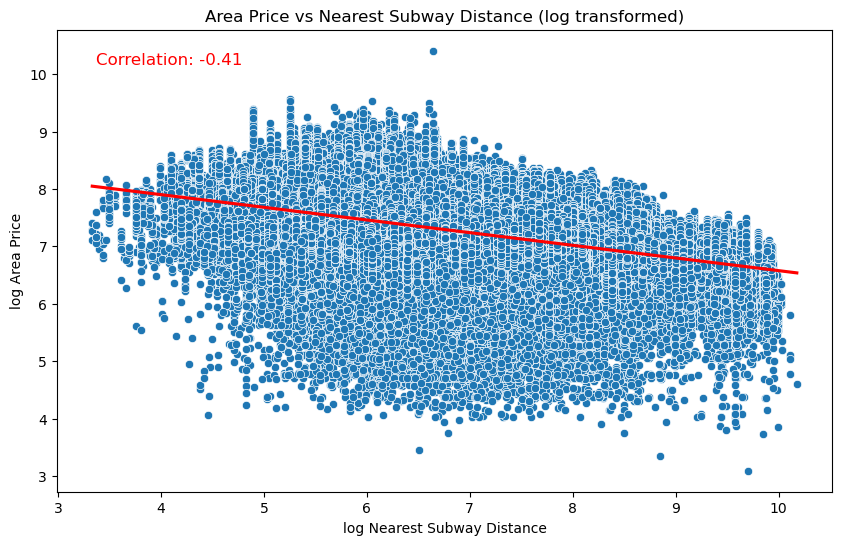

In [24]:
# log_area_price와 log_nearest_subway_distance 사이의 관계 시각화
corr_value_log_area_price = log_correlation_matrix.loc['log_area_price', 'log_nearest_subway_distance']
plt.figure(figsize=(10, 6))
plt.annotate(f'Correlation: {corr_value_log_area_price:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red', ha='left', va='top')
sns.scatterplot(x='log_nearest_subway_distance', y='log_area_price', data=train_df)
sns.regplot(data=train_df, x='log_nearest_subway_distance', y='log_area_price', scatter=False, color='red')
plt.title('Area Price vs Nearest Subway Distance (log transformed)')
plt.xlabel('log Nearest Subway Distance')
plt.ylabel('log Area Price')
plt.show()

C:\Users\shgkd\AppData\Local\Temp\ipykernel_8828\4063484910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_df['subway_distance_category'] = pd.cut(filtered_train_df['nearest_subway_distance'], bins=range(0, 10500, 500))
C:\Users\shgkd\AppData\Local\Temp\ipykernel_8828\4063484910.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_means = filtered_train_df.groupby('subway_distance_category')[['deposit', 'area_price']].mean().reset_index()


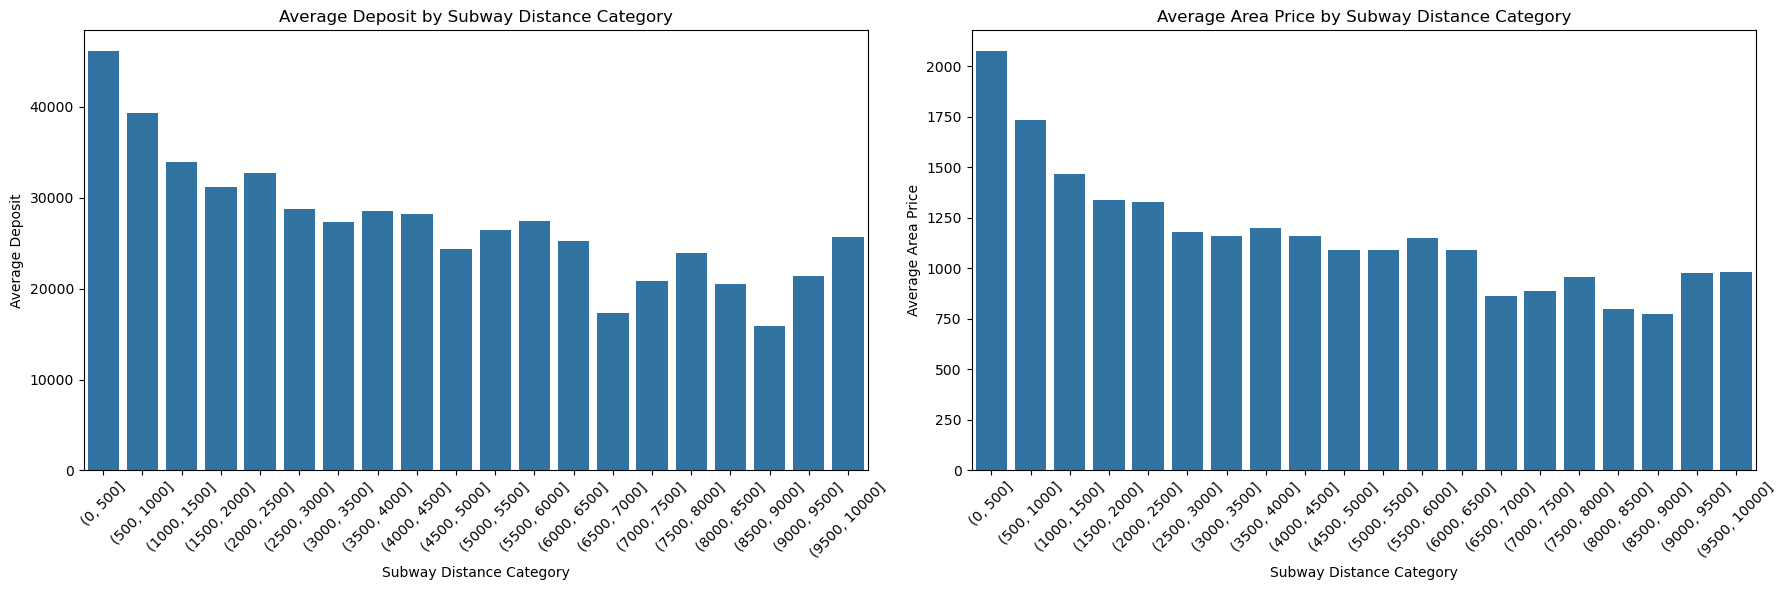

In [25]:
# 지하철역과의 거리가 10000이 넘어가는 데이터 제외
filtered_train_df = train_df[train_df['nearest_subway_distance'] <= 10000]

# 500단위로 분할해 카테고리 생성
filtered_train_df['subway_distance_category'] = pd.cut(filtered_train_df['nearest_subway_distance'], bins=range(0, 10500, 500))

# 각 카테고리당 deposit과 area_price의 평균값 계산
category_means = filtered_train_df.groupby('subway_distance_category')[['deposit', 'area_price']].mean().reset_index()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# deposit 평균값 시각화
sns.barplot(x='subway_distance_category', y='deposit', data=category_means, ax=axes[0])
axes[0].set_title('Average Deposit by Subway Distance Category')
axes[0].set_xlabel('Subway Distance Category')
axes[0].set_ylabel('Average Deposit')
axes[0].tick_params(axis='x', rotation=45)

# area_price 평균값 시각화
sns.barplot(x='subway_distance_category', y='area_price', data=category_means, ax=axes[1])
axes[1].set_title('Average Area Price by Subway Distance Category')
axes[1].set_xlabel('Subway Distance Category')
axes[1].set_ylabel('Average Area Price')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 가설 1(지하철역과 가격간의 상관관계) 검증
* 전세가격과 최근접 지하철역과의 거리는 -0.22의 상관관계가 있다.
각각 로그 변환시 -0.27로 늘어난다.

* 평당가격과 최근접 지하철역과의 거리는 -0.29의 상관관계가 있다.
각각 로그 변환시 -0.41로 매우 강한 상관관계가 보인다.

* 10km까지 500m 단위로 클래스를 나눠 평균 전세가격과 평균 평당가격을 봐도 가까울 수록 가격이 높게 형성된다.

****
## 가설 2. 가장 가까운 지하철이 무슨 역인지가 가격에 영향이 있을 것이다.

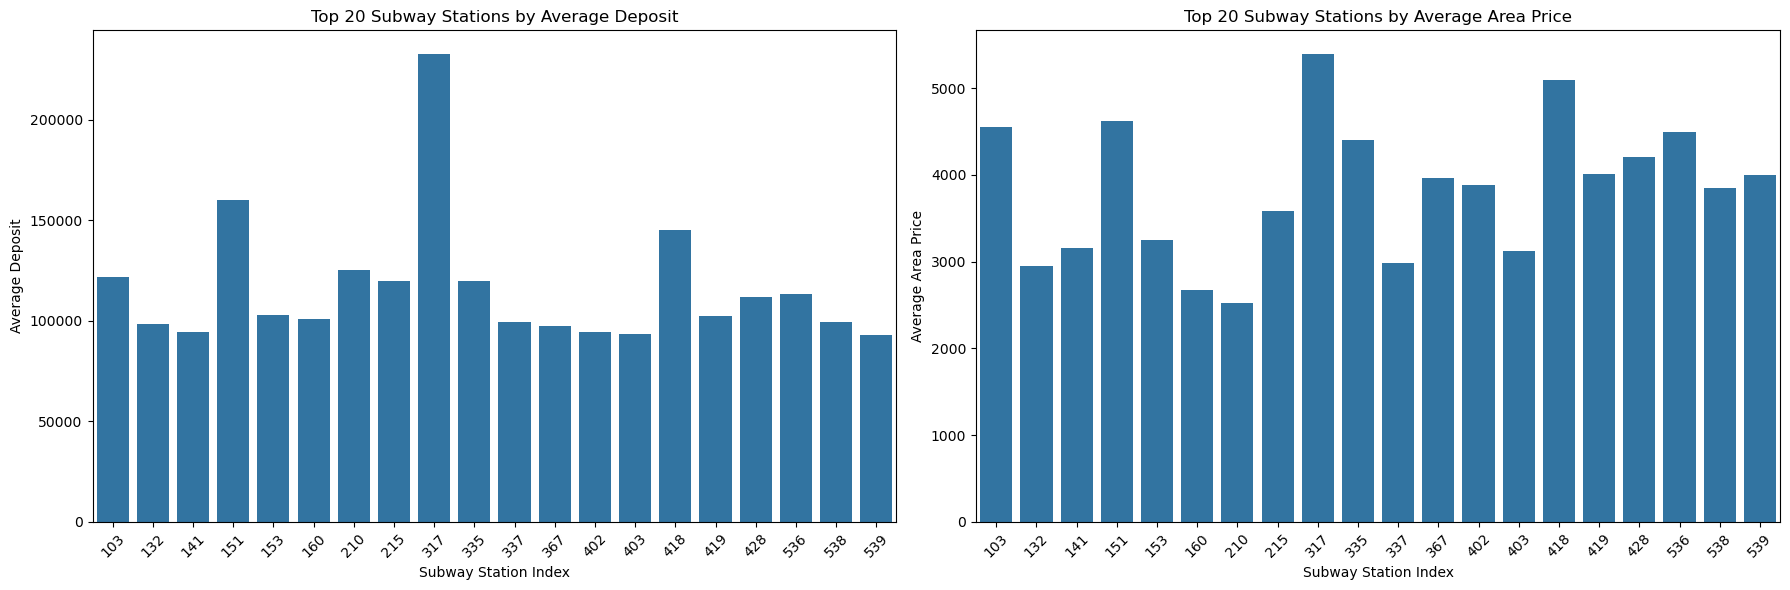

In [26]:
# nearest_subway_idx별로 평균 deposit과 area_price 계산
subway_means = train_df.groupby('nearest_subway_idx')[['deposit', 'area_price']].mean().reset_index()

# deposit과 area_price가 높은 상위 20개 지하철역 선택
top_20_subway_means = subway_means.nlargest(20, 'deposit')

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# deposit 평균값 시각화
sns.barplot(x='nearest_subway_idx', y='deposit', data=top_20_subway_means, ax=axes[0])
axes[0].set_title('Top 20 Subway Stations by Average Deposit')
axes[0].set_xlabel('Subway Station Index')
axes[0].set_ylabel('Average Deposit')
axes[0].tick_params(axis='x', rotation=45)

# area_price 평균값 시각화
sns.barplot(x='nearest_subway_idx', y='area_price', data=top_20_subway_means, ax=axes[1])
axes[1].set_title('Top 20 Subway Stations by Average Area Price')
axes[1].set_xlabel('Subway Station Index')
axes[1].set_ylabel('Average Area Price')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

****
## 가설 3. 특정 거리안에 몇개의 지하철이 있는지가 가격에 영향이 있을 것이다.

In [27]:
# train_df에서 numerical_col들만 deposit과의 상관계수를 내림차순으로 정렬해서 보여줌
numerical_cols = train_df.select_dtypes(include=[np.number]).columns
correlation_with_deposit = train_df[numerical_cols].corr()['deposit'].sort_values(ascending=False)
print(correlation_with_deposit)

deposit                        1.000000
log_deposit                    0.881870
area_price                     0.784147
area_m2_price                  0.784008
log_area_price                 0.724443
area                           0.521651
area_m2                        0.521623
num_subway_within_1km          0.314987
has_interchange_within_1km     0.259190
num_subway_within_500m         0.221344
apt_idx                        0.220488
index                          0.217950
longitude                      0.157374
built_year                     0.144960
floor                          0.132336
has_interchange_within_500m    0.116597
latitude                       0.075605
contract_year_month            0.073296
contract_day                   0.007355
nearest_subway_idx            -0.048851
contract_type                 -0.085880
age                           -0.136479
nearest_subway_distance       -0.216313
log_nearest_subway_distance   -0.263533
Name: deposit, dtype: float64


In [28]:
# train_df에서 numerical_col들만 area_price와의 상관계수를 내림차순으로 정렬해서 보여줌
correlation_with_area_price = train_df[numerical_cols].corr()['area_price'].sort_values(ascending=False)
print(correlation_with_area_price)

area_price                     1.000000
area_m2_price                  0.999992
log_area_price                 0.929081
deposit                        0.784147
log_deposit                    0.742079
num_subway_within_1km          0.419536
has_interchange_within_1km     0.330704
num_subway_within_500m         0.311769
index                          0.283101
apt_idx                        0.280750
built_year                     0.183334
longitude                      0.179188
has_interchange_within_500m    0.158918
latitude                       0.109493
floor                          0.101433
contract_year_month            0.093555
contract_day                   0.005154
area                          -0.009818
area_m2                       -0.009864
contract_type                 -0.109697
nearest_subway_idx            -0.110509
age                           -0.172458
nearest_subway_distance       -0.294698
log_nearest_subway_distance   -0.381129
Name: area_price, dtype: float64


C:\Users\shgkd\AppData\Local\Temp\ipykernel_8828\1088017741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['subway_count_category'] = pd.cut(train_df['num_subway_within_1km'], bins=range(0, train_df['num_subway_within_1km'].max() + 1, 1))
C:\Users\shgkd\AppData\Local\Temp\ipykernel_8828\1088017741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['subway_count_category'] = train_df['num_subway_within_1km'].astype(int)


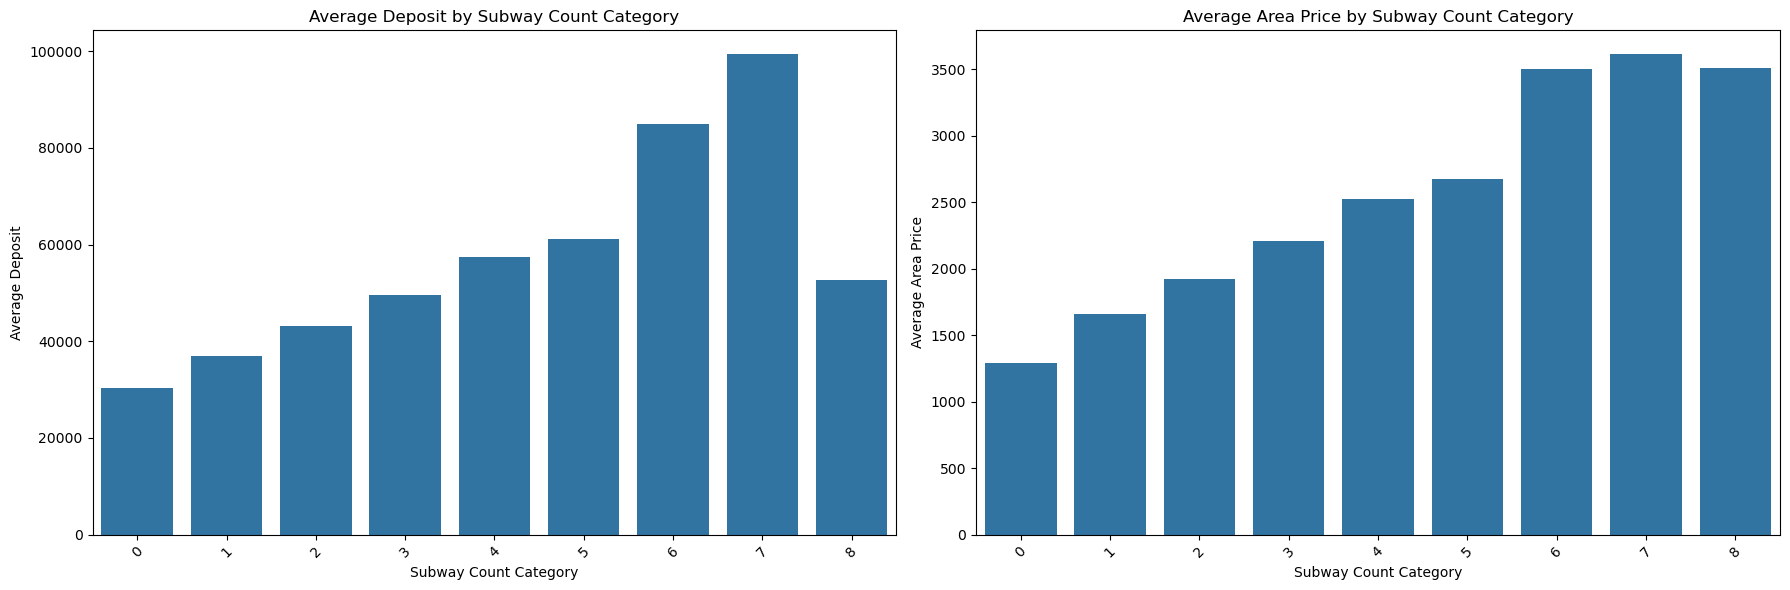

In [32]:
# num_subway_within_1km을 카테고리로 묶어서 각 카테고리당 평균 deposit과 평균 area_price 계산
train_df['subway_count_category'] = pd.cut(train_df['num_subway_within_1km'], bins=range(0, train_df['num_subway_within_1km'].max() + 1, 1))

# num_subway_within_1km을 정수형 카테고리로 변환
train_df['subway_count_category'] = train_df['num_subway_within_1km'].astype(int)
# 각 카테고리당 deposit과 area_price의 평균값 계산
subway_count_means = train_df.groupby('subway_count_category')[['deposit', 'area_price']].mean().reset_index()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# deposit 평균값 시각화
sns.barplot(x='subway_count_category', y='deposit', data=subway_count_means, ax=axes[0])
axes[0].set_title('Average Deposit by Subway Count Category')
axes[0].set_xlabel('Subway Count Category')
axes[0].set_ylabel('Average Deposit')
axes[0].tick_params(axis='x', rotation=45)

# area_price 평균값 시각화
sns.barplot(x='subway_count_category', y='area_price', data=subway_count_means, ax=axes[1])
axes[1].set_title('Average Area Price by Subway Count Category')
axes[1].set_xlabel('Subway Count Category')
axes[1].set_ylabel('Average Area Price')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [34]:
# num_subway_within_1km를 카테고리로 했을때 각 카테고리의 개수 계산
subway_count_category_counts = train_df['subway_count_category'].value_counts().sort_index()
print(subway_count_category_counts)

subway_count_category
0    661681
1    514502
2    359240
3    168145
4     67694
5     25237
6      4036
7       644
8        49
Name: count, dtype: int64


C:\Users\shgkd\AppData\Local\Temp\ipykernel_8828\2581848800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['subway_within_500m_category'] = pd.cut(train_df['num_subway_within_500m'], bins=range(0, train_df['num_subway_within_500m'].max() + 1, 1))
C:\Users\shgkd\AppData\Local\Temp\ipykernel_8828\2581848800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['subway_within_500m_category'] = train_df['num_subway_within_500m'].astype(int)


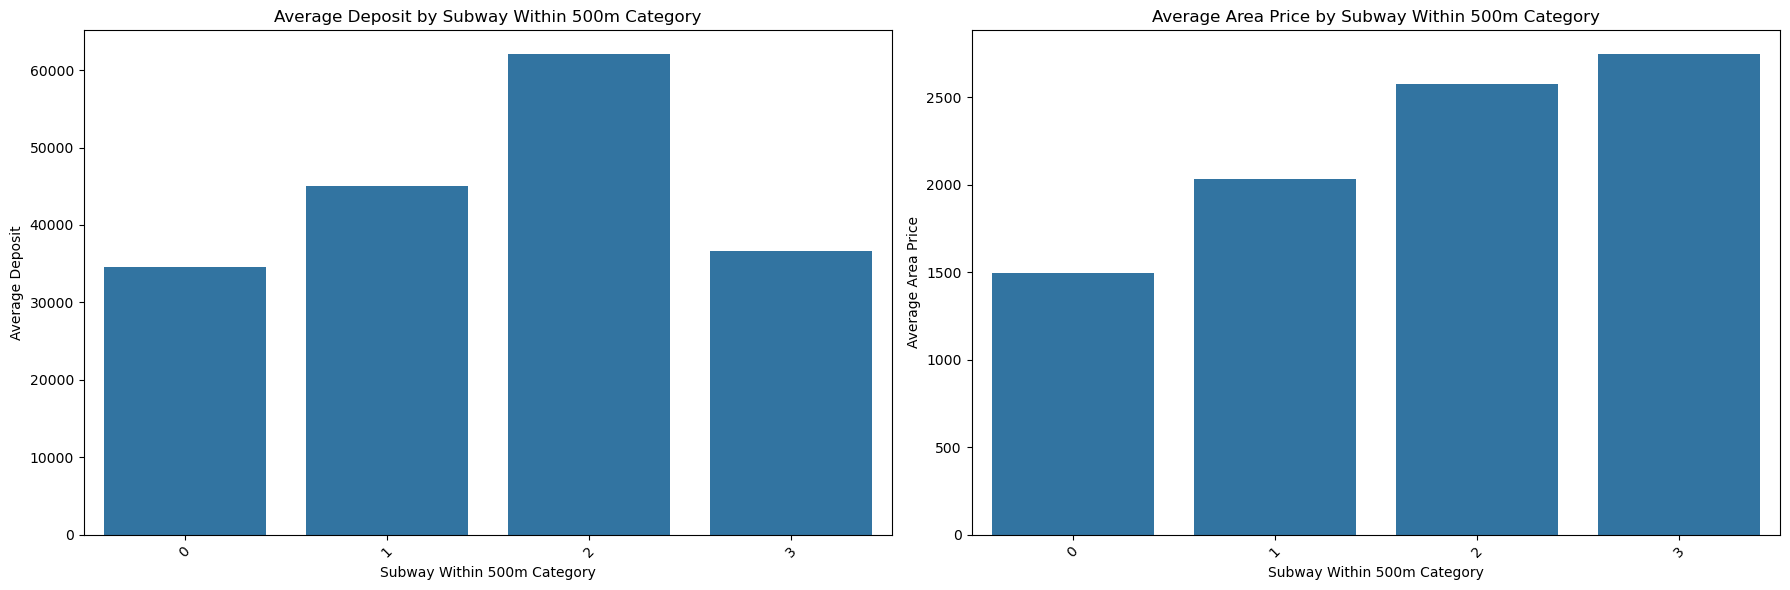

In [33]:
# num_subway_within_500m을 카테고리로 묶어서 각 카테고리당 평균 deposit과 평균 area_price 계산
train_df['subway_within_500m_category'] = pd.cut(train_df['num_subway_within_500m'], bins=range(0, train_df['num_subway_within_500m'].max() + 1, 1))
train_df['subway_within_500m_category'] = train_df['num_subway_within_500m'].astype(int)
# 각 카테고리당 deposit과 area_price의 평균값 계산
subway_within_500m_means = train_df.groupby('subway_within_500m_category')[['deposit', 'area_price']].mean().reset_index()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# deposit 평균값 시각화
sns.barplot(x='subway_within_500m_category', y='deposit', data=subway_within_500m_means, ax=axes[0])
axes[0].set_title('Average Deposit by Subway Within 500m Category')
axes[0].set_xlabel('Subway Within 500m Category')
axes[0].set_ylabel('Average Deposit')
axes[0].tick_params(axis='x', rotation=45)

# area_price 평균값 시각화
sns.barplot(x='subway_within_500m_category', y='area_price', data=subway_within_500m_means, ax=axes[1])
axes[1].set_title('Average Area Price by Subway Within 500m Category')
axes[1].set_xlabel('Subway Within 500m Category')
axes[1].set_ylabel('Average Area Price')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [35]:
print(train_df['subway_within_500m_category'].value_counts().sort_index())

subway_within_500m_category
0    1235163
1     524450
2      39585
3       2030
Name: count, dtype: int64


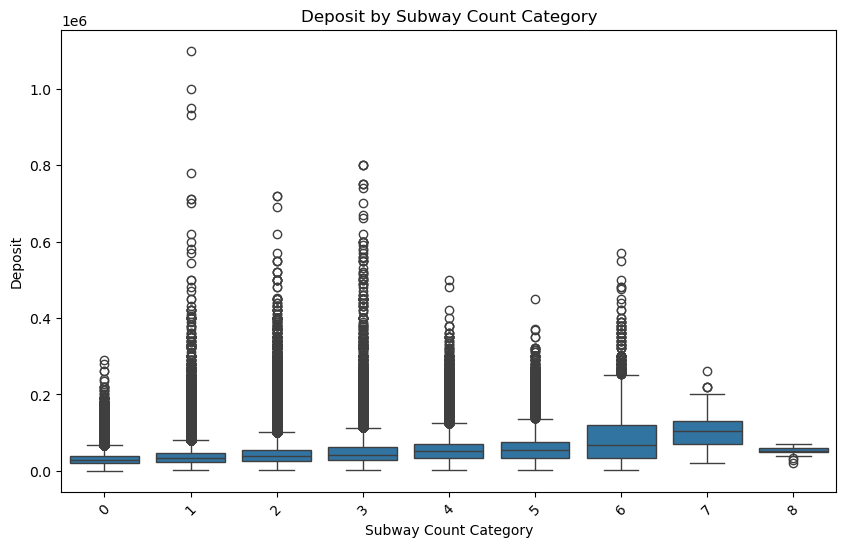

In [36]:
# subway_count_category와 deposit 사이의 관계 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='subway_count_category', y='deposit', data=train_df)
plt.title('Deposit by Subway Count Category')
plt.xlabel('Subway Count Category')
plt.ylabel('Deposit')
plt.xticks(rotation=45)
plt.show()

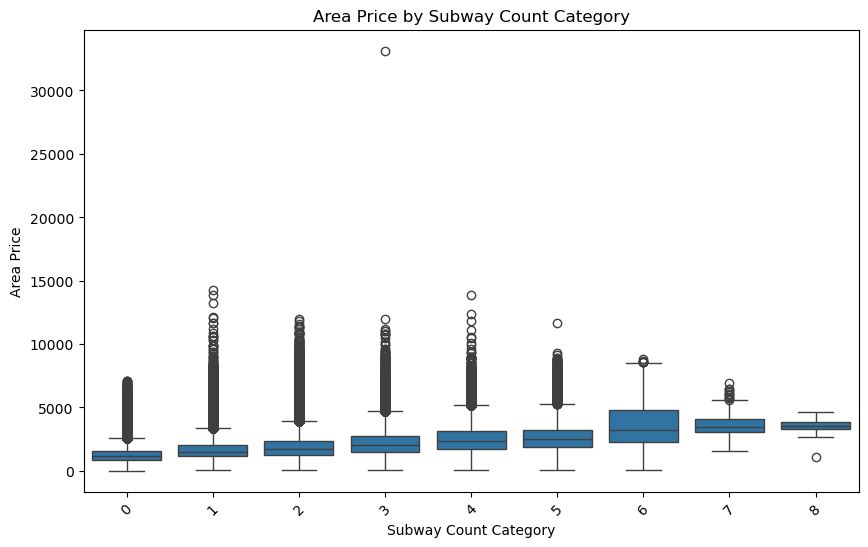

In [37]:
# subway_count_category와 area_price 사이의 관계 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='subway_count_category', y='area_price', data=train_df)
plt.title('Area Price by Subway Count Category')
plt.xlabel('Subway Count Category')
plt.ylabel('Area Price')
plt.xticks(rotation=45)
plt.show()

### 가설 3(특정 거리안에 몇개의 지하철이 있는지가 가격에 영향) 검증
* 전세가격과 1km이내 지하철역의 수는 상관계수 0.314987, 평당가격과는 0.419536가 나온다.

* 500m로 할 시 상관계수는 0.221344, 0.311769로 오히려 떨어진다.

* 1km이내 지하철역 수를 클래스로 만들어 평균 전세가격과 평균 평당가격을 봤을때는 강한 상관관계가 보인다.
평당가격이 오히려 더 설명이 잘되어 보인다.
boxplot으로도 강한 연관성을 확인할 수 있다.

****
## 가설 4. 주변 역이 환승역일경우 가격이 더 높을 것이다.

category_interchange_within_1km 지표는
반경 1km 내에 Interchange_station이 2 이상인 지하철역 존재 여부를 기반으로 'has_interchange_within_1km' 열 생성
조건:
0: 지하철역 없음
1: 지하철역 1개 이상, 환승역 없음
2: 지하철역 1개 이상, 환승역 포함

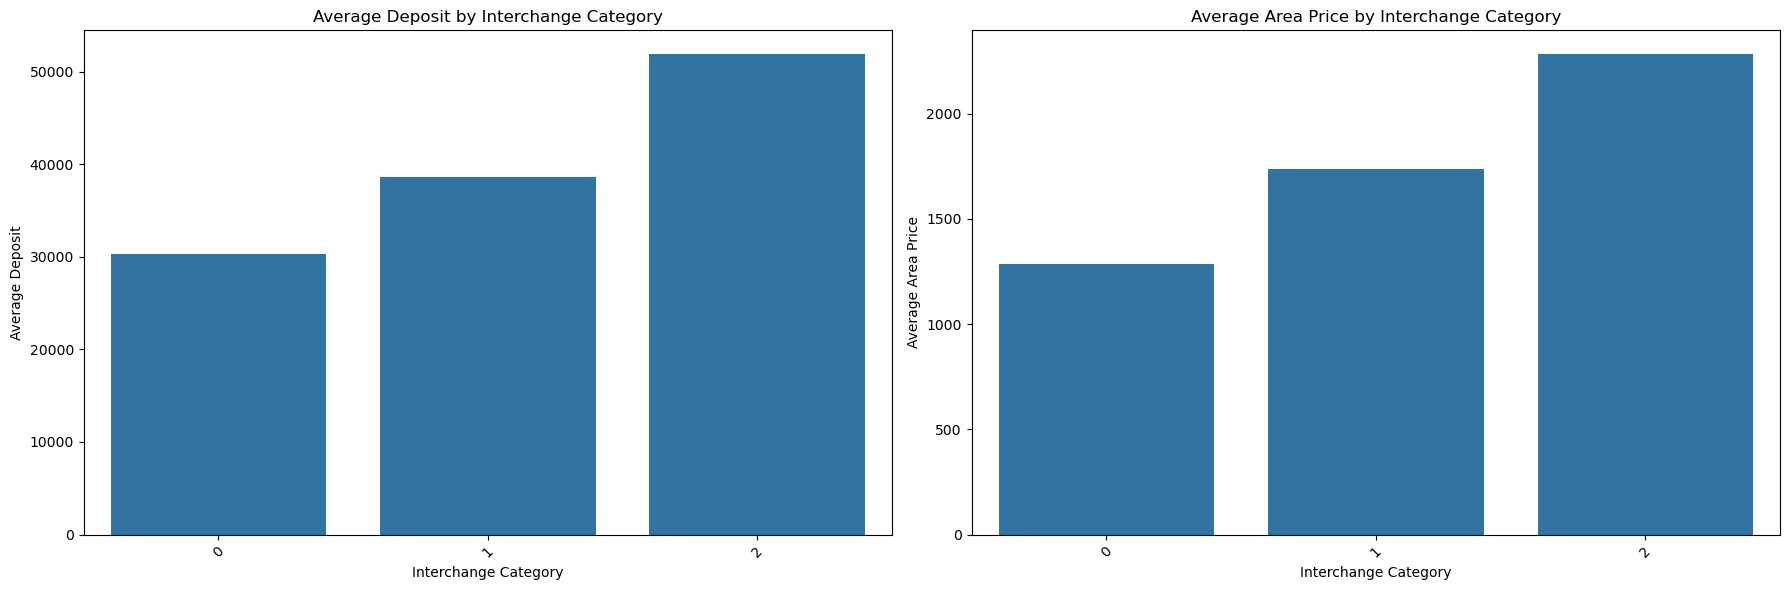

In [47]:
# category_interchange_within_1km를 가지고 각 카테고리별 평균 deposit과 평균 area_price 계산
interchange_means = train_df.groupby('category_interchange_within_1km')[['deposit', 'area_price']].mean().reset_index()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# deposit 평균값 시각화
sns.barplot(x='category_interchange_within_1km', y='deposit', data=interchange_means, ax=axes[0])
axes[0].set_title('Average Deposit by Interchange Category')
axes[0].set_xlabel('Interchange Category')
axes[0].set_ylabel('Average Deposit')
axes[0].tick_params(axis='x', rotation=45)

# area_price 평균값 시각화
sns.barplot(x='category_interchange_within_1km', y='area_price', data=interchange_means, ax=axes[1])
axes[1].set_title('Average Area Price by Interchange Category')
axes[1].set_xlabel('Interchange Category')
axes[1].set_ylabel('Average Area Price')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

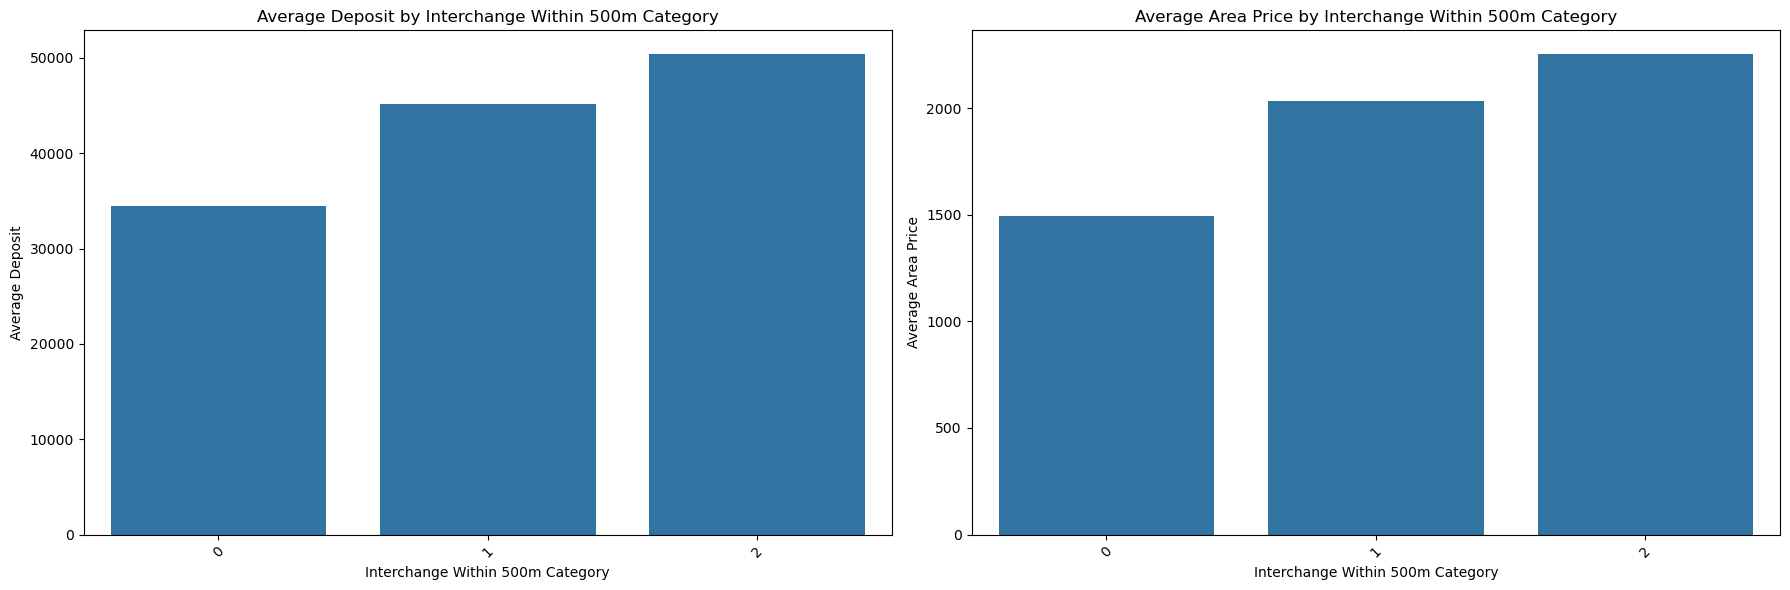

In [48]:
# category_interchange_within_500m를 가지고 각 카테고리별 평균 deposit과 평균 area_price 계산
interchange_within_500m_means = train_df.groupby('category_interchange_within_500m')[['deposit', 'area_price']].mean().reset_index()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# deposit 평균값 시각화
sns.barplot(x='category_interchange_within_500m', y='deposit', data=interchange_within_500m_means, ax=axes[0])
axes[0].set_title('Average Deposit by Interchange Within 500m Category')
axes[0].set_xlabel('Interchange Within 500m Category')
axes[0].set_ylabel('Average Deposit')
axes[0].tick_params(axis='x', rotation=45)

# area_price 평균값 시각화
sns.barplot(x='category_interchange_within_500m', y='area_price', data=interchange_within_500m_means, ax=axes[1])
axes[1].set_title('Average Area Price by Interchange Within 500m Category')
axes[1].set_xlabel('Interchange Within 500m Category')
axes[1].set_ylabel('Average Area Price')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 가설 4(특정 거리안에 몇개의 지하철이 있는지가 가격에 영향) 검증
* 주변(1km든, 500m든)에 환승역일경우 환승역이 아닐때보다 평균 전세(및 평당)가격이 높다.

* 주변에 환승역이 아닌 일반역이 있는 경우, 역이 없을 때보다 평균 전세(및 평당) 가격이 높다.
